## Course success analysis
This project focuses on the development of the courses, esp. their enrolments and acquired certificats 

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import timedelta

In [2]:
# define a list of sheet names

dates_str = ['28.01.2026', '19.12.2025', '27.11.2025', '28.10.2025', '26.09.2025', '26.08.2025', '28.07.2025', '23.06.2025', '21.05.2025']


In [3]:
# import data by looping over the sheet names

course_df = pd.DataFrame()

for sheet_str in dates_str:
    import_path = 'C:/Users/ywa/Documents/Data/Course_success_tracking/course_success_tracking.xlsx'
    df = pd.read_excel(import_path, sheet_name = sheet_str)
    df['date'] = sheet_str
    df['date'] =  pd.to_datetime(df['date'], format = '%d.%m.%Y')
    df['month'] = df['date'].dt.month
    course_df = pd.concat([course_df, df], axis = 0, ignore_index = True) 
    
course_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   courseID                                   772 non-null    float64       
 1   Live Courses                               772 non-null    object        
 2   Course Category                            772 non-null    object        
 3   Enrolled learners                          773 non-null    float64       
 4   Acquired # Comfirmation of Participations  759 non-null    float64       
 5   Acquired # Records of Achievement          753 non-null    float64       
 6   Rate CoP                                   761 non-null    float64       
 7   Rate RoA (success)                         755 non-null    float64       
 8   date                                       774 non-null    datetime64[ns]
 9   month                

In [4]:
# change the column names --> too wordy

course_df.columns = ['courseID', 'Live Courses', 'Course Category', 'Enrolled learners', 'CoP', 'RoA', 'Rate CoP', 'Rate RoA', 'date', 'month']

course_df.head()


,courseID,Live Courses,Course Category,Enrolled learners,CoP,RoA,Rate CoP,Rate RoA,date,month
0,106.0,Einführung in die KI,Über KI,16330.0,2678.0,2144.0,0.163993,0.131292,2026-01-28,1
1,58.0,AICE your exams – Generative KI als Copilot im...,Studieren,13113.0,9173.0,5010.0,0.699535,0.382064,2026-01-28,1
2,99.0,KI für Alle 1: Einführung in die Künstliche In...,Über KI,6840.0,515.0,369.0,0.075292,0.053947,2026-01-28,1
3,313.0,EU AI Act Essentials,Studieren,5670.0,1846.0,1413.0,0.325573,0.249206,2026-01-28,1
4,197.0,KIÖV - KI in öffentlichen Verwaltungen,Studieren,4861.0,2474.0,2184.0,0.508949,0.449290,2026-01-28,1


In [5]:
# the latest date for indexing
latest_date = course_df.loc[:, 'date'][0]

latest_date

Timestamp('2026-01-28 00:00:00')

## Enrolment & certificates

In [6]:
# create table of enrolment

monthly_enrol = course_df.groupby(['date'])['Enrolled learners', 'CoP', 'RoA'].agg(sum)

monthly_enrol


C:\Users\ywa\AppData\Local\Temp\ipykernel_20772\3223736409.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_enrol = course_df.groupby(['date'])['Enrolled learners', 'CoP', 'RoA'].agg(sum)


,Enrolled learners,CoP,RoA
date,,,
2025-05-21,55507.00,8893.0,6840.0
2025-06-23,62536.05,10380.0,7938.0
2025-07-28,69711.00,12154.0,9359.0
2025-08-26,76808.00,13843.0,10756.0
2025-09-26,86982.00,15783.0,12284.0
2025-10-28,99671.00,17950.0,14051.0
2025-11-27,111626.00,20839.0,16425.0
2025-12-19,122197.00,24159.0,18930.0
2026-01-28,140990.00,33822.0,25666.0


In [7]:
# calculate the changes per month --> via function 

def rate_enrol_cert(df):
    df['rate_enrol'] = df['Enrolled learners'].pct_change()
    df['rate_CoP'] = df['CoP'].pct_change()
    df['rate_RoA'] = df['RoA'].pct_change()
    return df

monthly_enrol = rate_enrol_cert(monthly_enrol)

monthly_enrol


,Enrolled learners,CoP,RoA,rate_enrol,rate_CoP,rate_RoA
date,,,,,,
2025-05-21,55507.00,8893.0,6840.0,NaN,NaN,NaN
2025-06-23,62536.05,10380.0,7938.0,0.126634,0.167210,0.160526
2025-07-28,69711.00,12154.0,9359.0,0.114733,0.170906,0.179012
2025-08-26,76808.00,13843.0,10756.0,0.101806,0.138967,0.149268
2025-09-26,86982.00,15783.0,12284.0,0.132460,0.140143,0.142060
2025-10-28,99671.00,17950.0,14051.0,0.145881,0.137300,0.143846
2025-11-27,111626.00,20839.0,16425.0,0.119945,0.160947,0.168956
2025-12-19,122197.00,24159.0,18930.0,0.094700,0.159317,0.152511
2026-01-28,140990.00,33822.0,25666.0,0.153793,0.399975,0.355837


<Axes: >

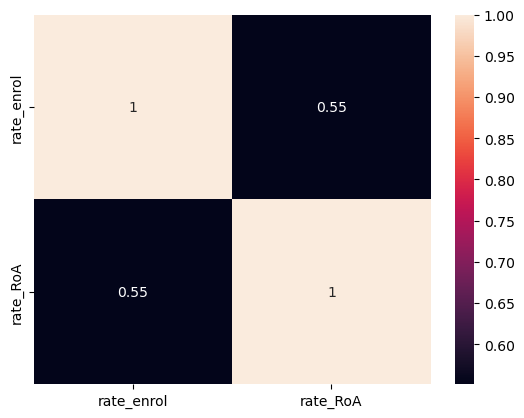

In [8]:
# rate correlation

enrol_cert_change = monthly_enrol[['rate_enrol', 'rate_RoA']].corr()

sns.heatmap(enrol_cert_change, annot = True) # moderate positive correalation between percentage of enrollment and percentage of RoA


In [9]:
# enrolment rate & RoA rate

print('The highest enrolment rate was:',round(monthly_enrol['rate_enrol'].max(), 2), 'in month', monthly_enrol['rate_enrol'].idxmax())
print('The lowest enrolment rate was:', round(monthly_enrol['rate_enrol'].min(), 2), 'in month', monthly_enrol['rate_enrol'].idxmin())

print('The highest RoA rate was:',round(monthly_enrol['rate_RoA'].max(), 2), 'in month', monthly_enrol['rate_RoA'].idxmax())
print('The lowest RoA rate was:', round(monthly_enrol['rate_RoA'].min(), 2), 'in month', monthly_enrol['rate_RoA'].idxmin())



The highest enrolment rate was: 0.15 in month 2026-01-28 00:00:00
The lowest enrolment rate was: 0.09 in month 2025-12-19 00:00:00
The highest RoA rate was: 0.36 in month 2026-01-28 00:00:00
The lowest RoA rate was: 0.14 in month 2025-09-26 00:00:00


<Figure size 1400x500 with 0 Axes>

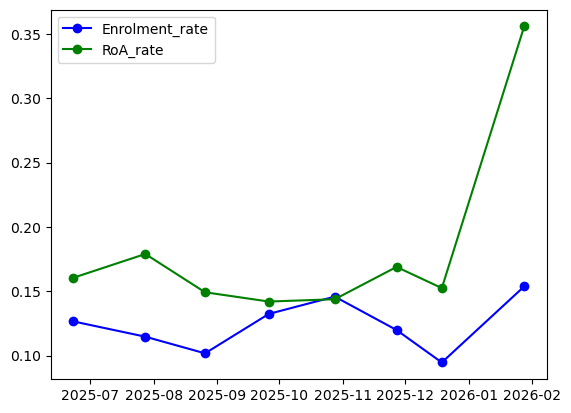

In [10]:
# plotting enrol rate & RoA rate

plt.figure(figsize = (14, 5))
fig, ax = plt.subplots()

x_col='Date'
y_col = 'Rate'

ax.plot_date(monthly_enrol.index, monthly_enrol["rate_enrol"], color="blue", label="Enrolment_rate", linestyle="-")
ax.plot_date(monthly_enrol.index, monthly_enrol["rate_RoA"], color="green", label="RoA_rate", linestyle="-")

ax.legend()


## Correlation among all courses and roa

<Axes: xlabel='Enrolled learners', ylabel='RoA'>

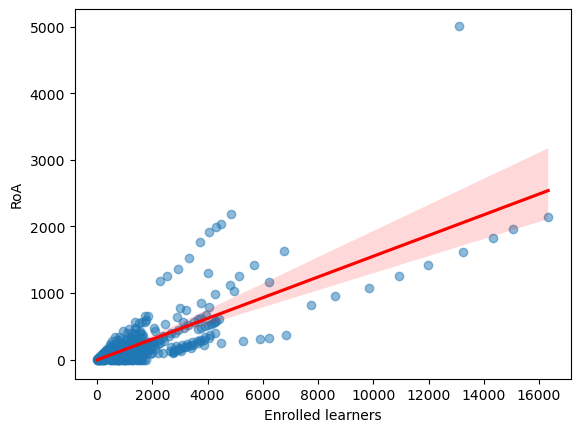

In [11]:
# Scatter plot

sns.regplot(data = course_df, x = 'Enrolled learners', y = 'RoA', scatter_kws = {'alpha' : 0.5}, line_kws = {'color' : 'red', 'label' : 'Trend line'})

In [12]:
# calculation of the correlation value
corr_enrol_roa = course_df['Enrolled learners'].corr(course_df['RoA'])

print('Correlation between enrolment and RoA:', corr_enrol_roa)

Correlation between enrolment and RoA: 0.7904423046287111


## top 10 Enrolments and RoA -- average growth

In [13]:
# group the table based on the courses

enrol_by_course = course_df.groupby(['Live Courses'])['Enrolled learners', 'RoA', 'Rate RoA'].agg(np.mean)

enrol_by_course.columns = ['Avg_enrol', 'Avg_RoA', 'Avg_rate_RoA']

enrol_by_course['Avg_enrol'] = round(enrol_by_course['Avg_enrol'], 0)

enrol_by_course['Avg_RoA'] = round(enrol_by_course['Avg_RoA'], 2)

enrol_by_course['Avg_rate_RoA'] = round(enrol_by_course['Avg_rate_RoA'], 2)

enrol_by_course

C:\Users\ywa\AppData\Local\Temp\ipykernel_20772\342491711.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  enrol_by_course = course_df.groupby(['Live Courses'])['Enrolled learners', 'RoA', 'Rate RoA'].agg(np.mean)


,Avg_enrol,Avg_RoA,Avg_rate_RoA
Live Courses,,,
AI Explorables for Schools,110.0,3.78,0.03
AI4Democracy - Grundlagen zu KI in der Demokratie,1450.0,416.56,0.28
AICE your exams – Generative KI als Copilot im Schul- und Unialltag,4623.0,825.67,0.11
AI_VET I – KI im Kontext von Lehren und Lernen,349.0,57.33,0.16
AI_VET II – Learning Analytics,117.0,30.78,0.26
...,...,...,...
Stochastic Foundations,195.0,0.75,0.00
Teampraktiken für sozialverantwortliche KI-Gestaltung,538.0,170.44,0.32
Von der Datenanalyse zur Datengeschichte,419.0,44.78,0.10


In [34]:
# plotting function

def plot_topX_horizontal(title, series, xlabel, x = 10, show_values = False):
    plt.figure(figsize = (14, 8))
    
    series = series.sort_values(ascending = False)
    ax = series.iloc[: x].iloc[: : -1].plot(kind="barh")

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Course Name')
    plt.grid(axis = 'x')
    
    # show values
    if show_values == True:
        for bar in ax.patches:
            width = bar.get_width()
            y = bar.get_y() + bar.get_height() / 2
            ax.text(width, y, f'{width:.2f}', va = 'center', ha = 'left', color = 'black', fontweight = 'bold', fontsize = 10, clip_on = False)
        
    plt.tight_layout()
    plt.show()

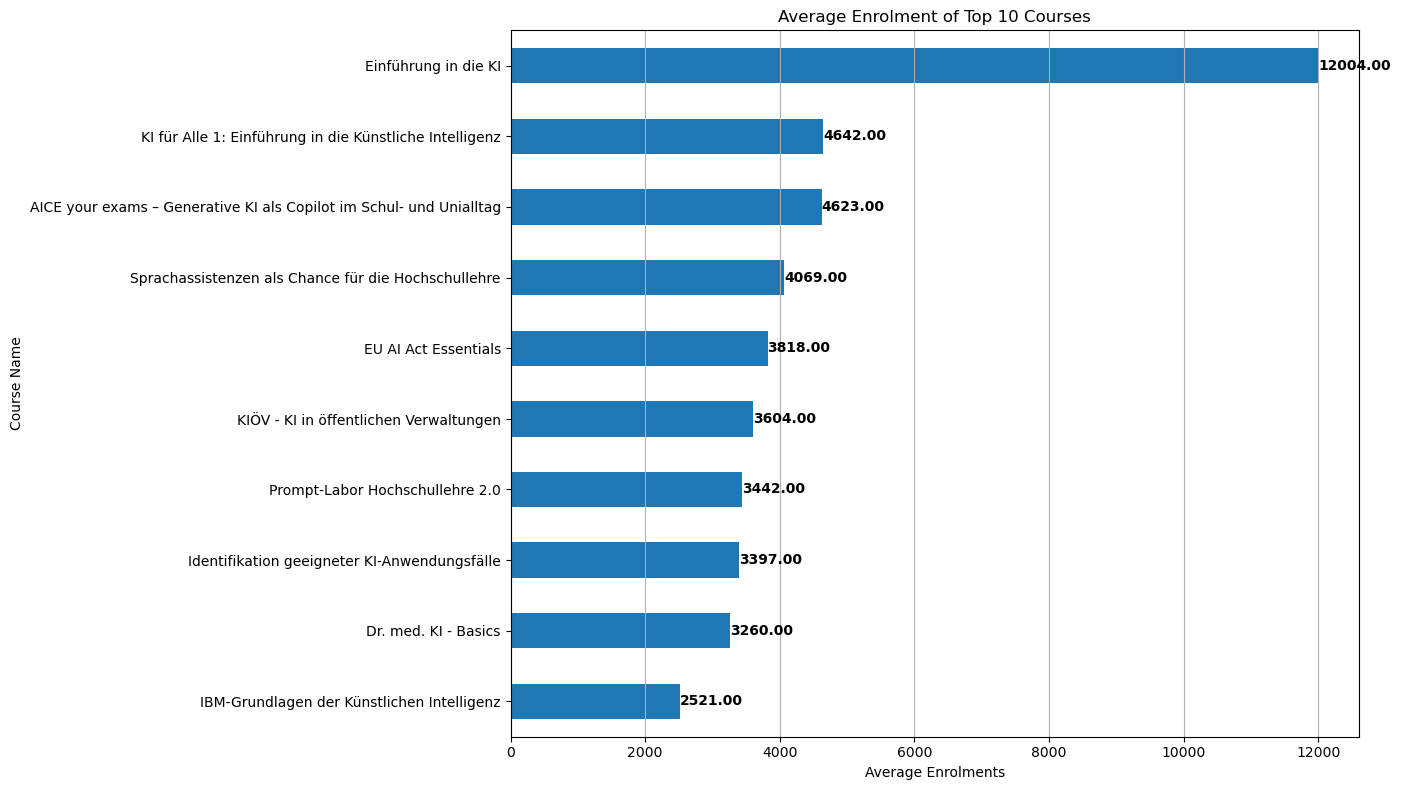

In [35]:
#  ranking base on the three differnt variables

# ranking based on Avg_enrol
plot_topX_horizontal('Average Enrolment of Top 10 Courses', enrol_by_course['Avg_enrol'], xlabel = 'Average Enrolments', show_values = True)


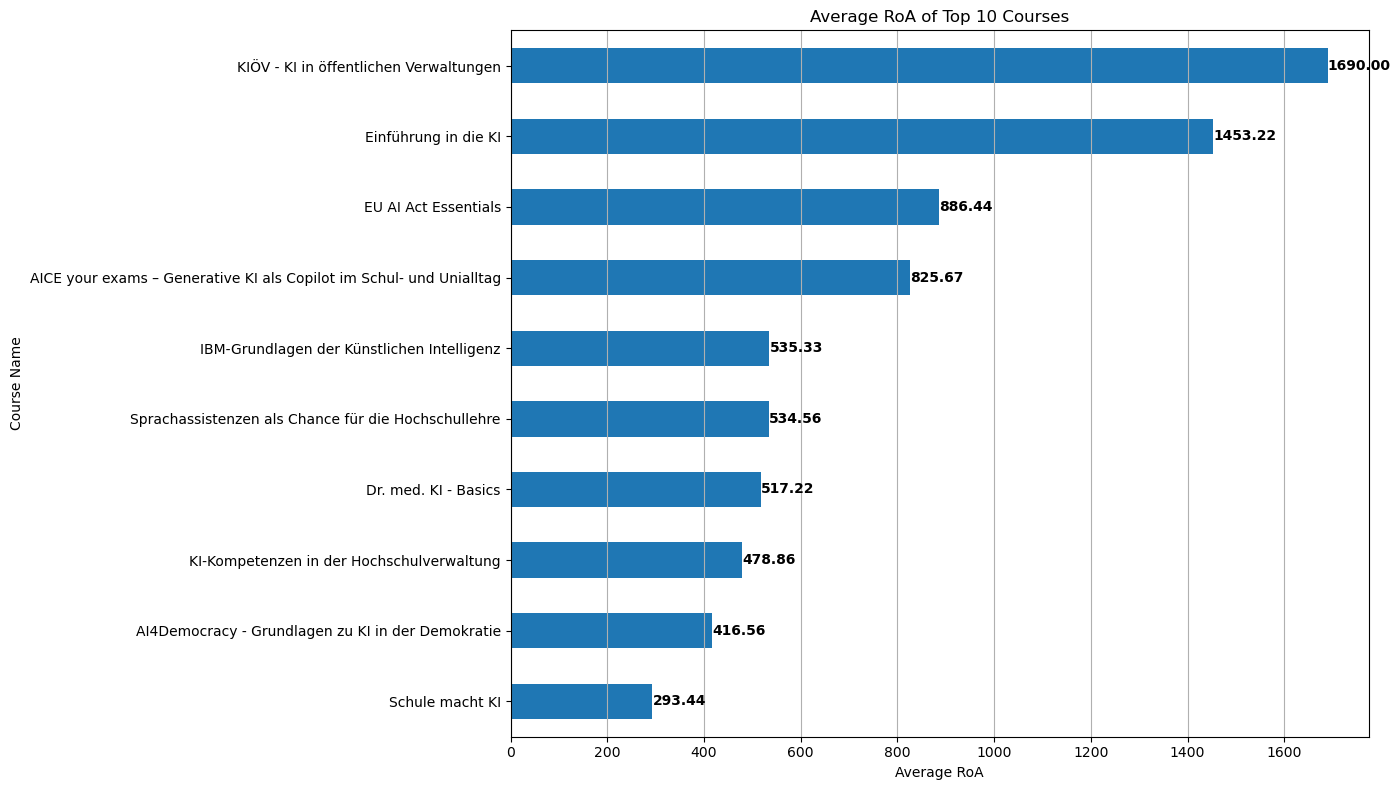

In [36]:
# ranking based on Avg_RoA
plot_topX_horizontal('Average RoA of Top 10 Courses', enrol_by_course['Avg_RoA'], xlabel = 'Average RoA', show_values = True)


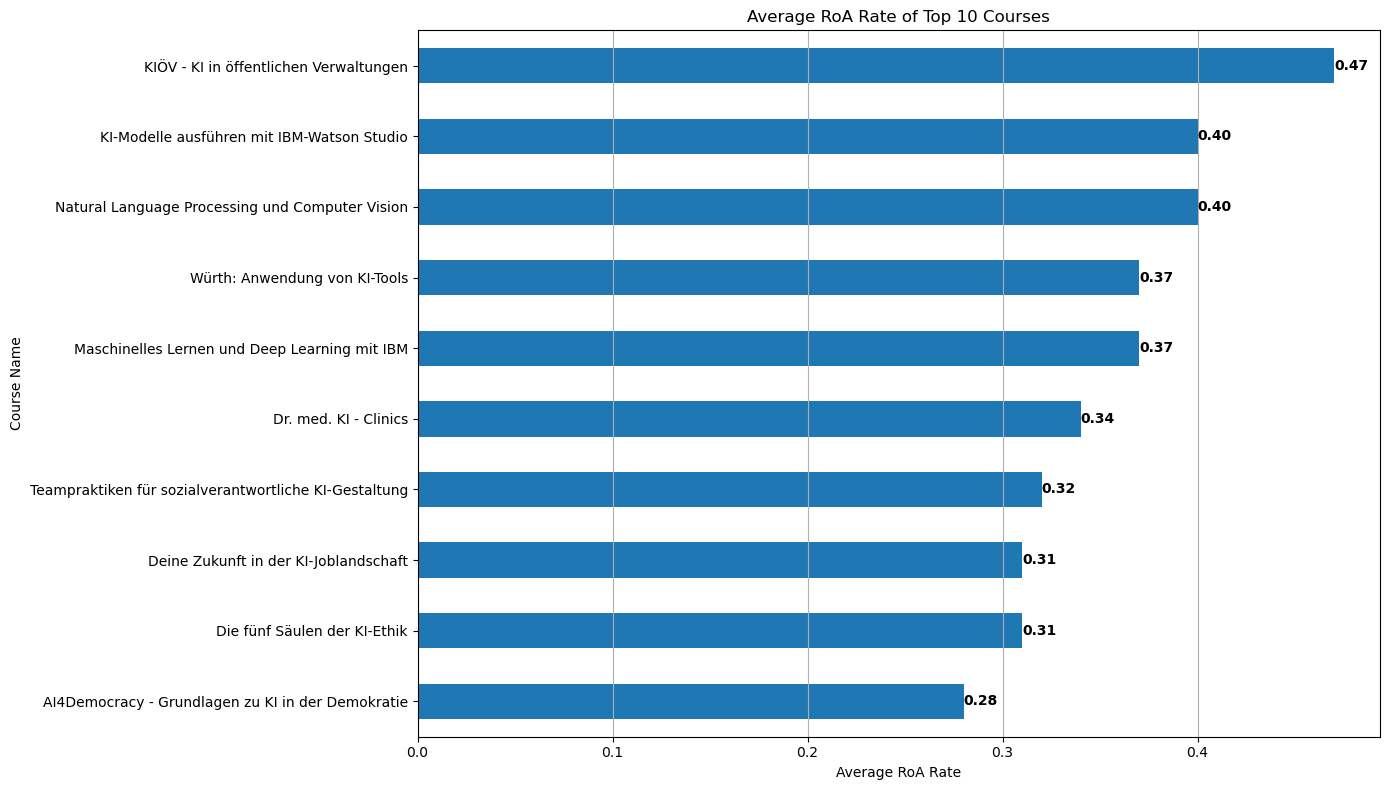

In [37]:
# Ranking based on RoA_Rate
plot_topX_horizontal('Average RoA Rate of Top 10 Courses', enrol_by_course['Avg_rate_RoA'], xlabel = 'Average RoA Rate', show_values = True)


## Time series of top 10

In [38]:
# getting indicies of the top 10 --> list of coures names

# avg enrol
top_10_enrol = enrol_by_course['Avg_enrol'].sort_values(ascending = False).head(10).index

# avg RoA
top_10_RoA = enrol_by_course['Avg_RoA'].sort_values(ascending = False).head(10).index

# avg rate RoA
top_10_rate_RoA = enrol_by_course['Avg_rate_RoA'].sort_values(ascending = False).head(10).index



In [39]:
# index top courses

# top enrol
top10_enrol_allTime = course_df[course_df['Live Courses'].isin(top_10_enrol)]

top10_enrol_allTime.head()

# pivot table

top10_enrol_allTime_pivot = top10_enrol_allTime.pivot(index = 'date', columns = 'Live Courses', values = 'Enrolled learners')

top10_enrol_allTime_pivot.head()


Live Courses,AICE your exams – Generative KI als Copilot im Schul- und Unialltag,Dr. med. KI - Basics,EU AI Act Essentials,Einführung in die KI,IBM-Grundlagen der Künstlichen Intelligenz,Identifikation geeigneter KI-Anwendungsfälle,KI für Alle 1: Einführung in die Künstliche Intelligenz,KIÖV - KI in öffentlichen Verwaltungen,Prompt-Labor Hochschullehre 2.0,Sprachassistenzen als Chance für die Hochschullehre
date,,,,,,,,,,
2025-05-21,2767.0,2406.0,2113.0,7738.0,167.0,2691.0,2761.0,2273.0,2634.0,3652.0
2025-06-23,2920.0,2682.0,2473.0,8631.0,430.0,2856.0,3026.0,2517.0,2770.0,3755.0
2025-07-28,3022.0,2932.0,2895.0,9857.0,687.0,3067.0,3385.0,2919.0,2975.0,3919.0
2025-08-26,3146.0,3137.0,3232.0,10916.0,871.0,3257.0,3881.0,3312.0,3167.0,4017.0
2025-09-26,3276.0,3297.0,3747.0,11961.0,1632.0,3431.0,4484.0,3718.0,3416.0,4109.0


In [40]:
# top RoA
top10_RoA_allTime = course_df[course_df['Live Courses'].isin(top_10_RoA)]

top10_RoA_allTime.head()

top10_RoA_allTime_pivot = top10_RoA_allTime.pivot(index = 'date', columns = 'Live Courses', values = 'RoA')

top10_RoA_allTime_pivot.head()

Live Courses,AI4Democracy - Grundlagen zu KI in der Demokratie,AICE your exams – Generative KI als Copilot im Schul- und Unialltag,Dr. med. KI - Basics,EU AI Act Essentials,Einführung in die KI,IBM-Grundlagen der Künstlichen Intelligenz,KI-Kompetenzen in der Hochschulverwaltung,KIÖV - KI in öffentlichen Verwaltungen,Schule macht KI,Sprachassistenzen als Chance für die Hochschullehre
date,,,,,,,,,,
2025-05-21,228.0,105.0,354.0,436.0,823.0,35.0,NaN,1186.0,226.0,460.0
2025-06-23,271.0,140.0,398.0,532.0,954.0,85.0,NaN,1249.0,240.0,479.0
2025-07-28,299.0,163.0,438.0,643.0,1081.0,168.0,45.0,1365.0,258.0,505.0
2025-08-26,331.0,183.0,480.0,744.0,1258.0,213.0,155.0,1532.0,270.0,526.0
2025-09-26,377.0,204.0,518.0,847.0,1414.0,318.0,253.0,1758.0,282.0,540.0


In [41]:
# top RoA Rate
top10_RoA_rate_allTime = course_df[course_df['Live Courses'].isin(top_10_rate_RoA)]

top10_RoA_rate_allTime.head()

top10_RoA_rate_allTime_pivot = top10_RoA_rate_allTime.pivot(index = 'date', columns = 'Live Courses', values = 'Rate RoA')

top10_RoA_rate_allTime_pivot.head()


Live Courses,AI4Democracy - Grundlagen zu KI in der Demokratie,Deine Zukunft in der KI-Joblandschaft,Die fünf Säulen der KI-Ethik,Dr. med. KI - Clinics,KI-Modelle ausführen mit IBM-Watson Studio,KIÖV - KI in öffentlichen Verwaltungen,Maschinelles Lernen und Deep Learning mit IBM,Natural Language Processing und Computer Vision,Teampraktiken für sozialverantwortliche KI-Gestaltung,Würth: Anwendung von KI-Tools
date,,,,,,,,,,
2025-05-21,0.211503,0.287500,0.256410,0.305556,0.000000,0.521777,0.300000,0.409091,0.331034,0.351852
2025-06-23,0.233621,0.300971,0.251029,0.325843,0.301587,0.496226,0.313725,0.323810,0.328160,0.363229
2025-07-28,0.243287,0.291066,0.293532,0.328165,0.411765,0.467626,0.388430,0.370787,0.315126,0.363229
2025-08-26,0.253834,0.303093,0.311072,0.330144,0.451429,0.462560,0.423295,0.420000,0.308000,0.367713
2025-09-26,0.270639,0.306477,0.317439,0.334821,0.443137,0.472835,0.415094,0.431138,0.303371,0.367713


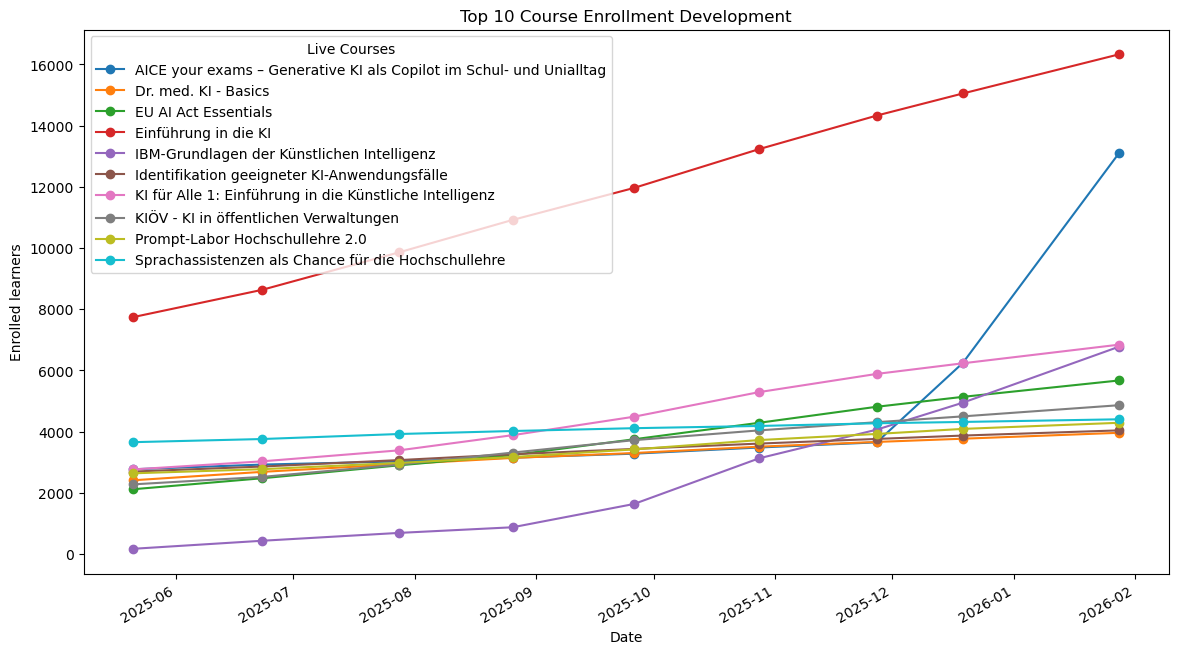

In [42]:
# plot timeseries of the top 10 courses

top10_enrol_allTime_pivot.plot(figsize = (14, 8), marker = 'o')

plt.xlabel('Date')
plt.ylabel('Enrolled learners')
plt.title('Top 10 Course Enrollment Development')
plt.show()
    

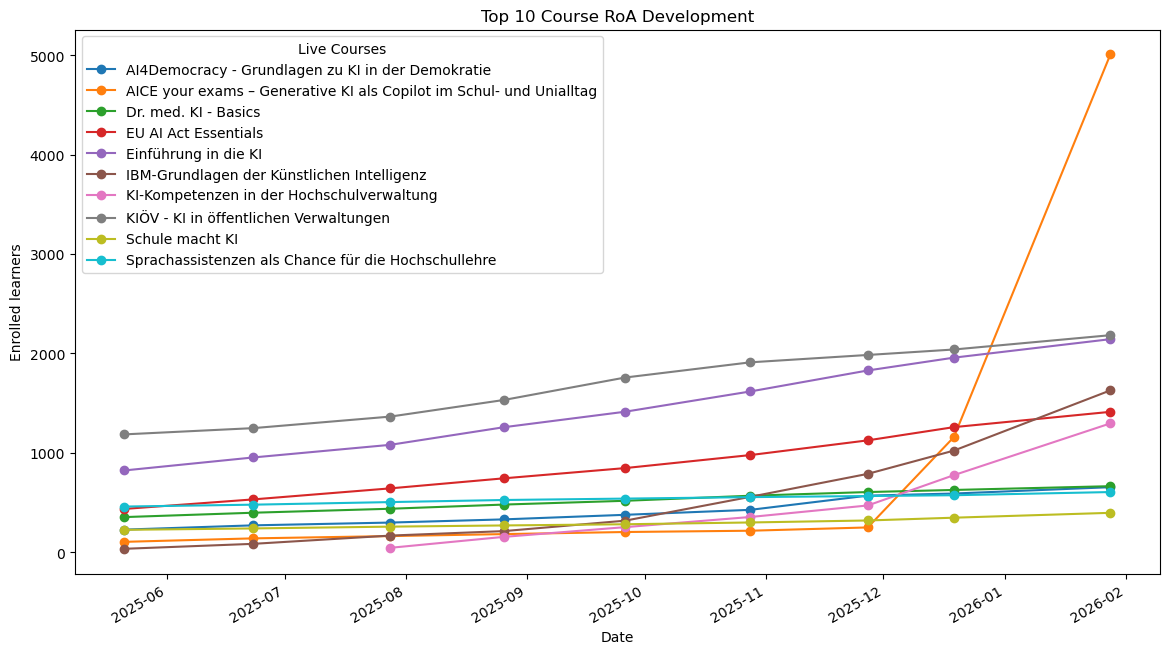

In [43]:
# top10 RoA

top10_RoA_allTime_pivot.plot(figsize = (14, 8), marker = 'o')

plt.xlabel('Date')
plt.ylabel('Enrolled learners')
plt.title('Top 10 Course RoA Development')
plt.show()
    


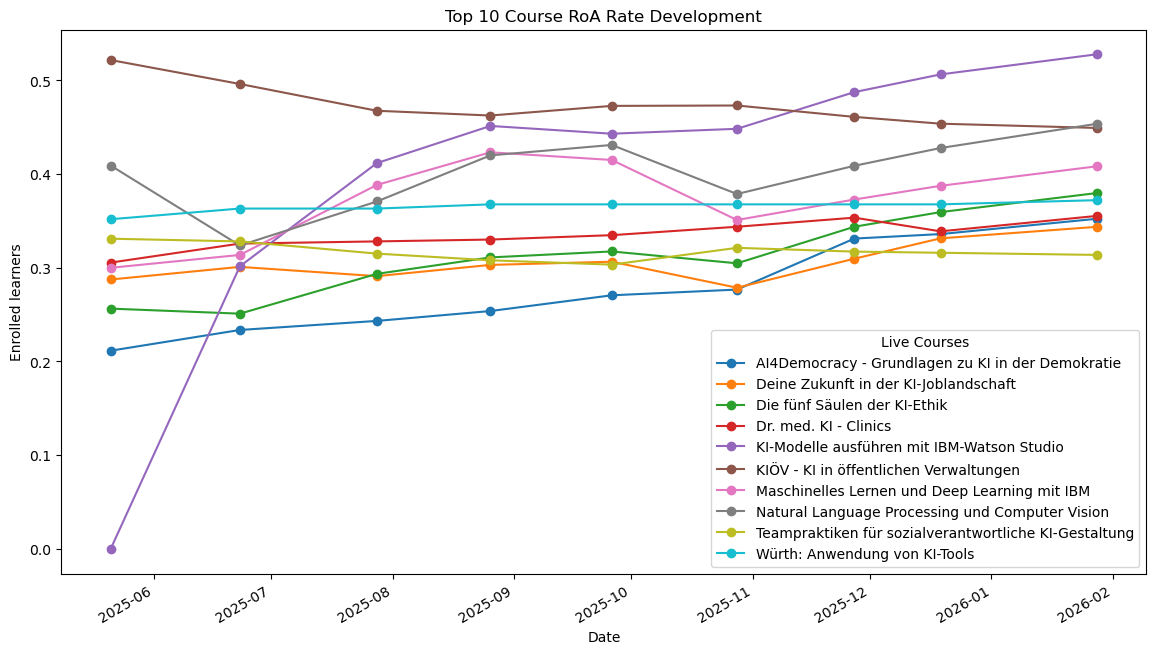

In [44]:
# Top 10 RoA Rate

top10_RoA_rate_allTime_pivot.plot(figsize = (14, 8), marker = 'o')

plt.xlabel('Date')
plt.ylabel('Enrolled learners')
plt.title('Top 10 Course RoA Rate Development')
plt.show()
    

## Analysis per course category

In [45]:
# Aggregation of enrolment per category

print(f"# of total course category: {course_df['Course Category'].nunique()}")

# the number of courses in each category
course_df.groupby('Course Category')['Live Courses'].nunique()


# of total course category: 11


Course Category
Data Literacy           6
Erwachsenenbildung      4
Handel                  1
Industrie 4.0          10
KI und Ethik            6
Maschinelles Lernen    13
Medizin                10
Robotik                 1
Schule                 12
Studieren              19
Über KI                18
Name: Live Courses, dtype: int64

In [46]:
# average course enrolment per category

course_per_cat= pd.DataFrame(course_df.groupby('Course Category').agg(num_courses = ('Live Courses', 'nunique'), avg_enrol = ('Enrolled learners', 'mean'), avg_RoA = ('RoA', 'mean'), avg_RoA_rate = ('Rate RoA', 'mean')))

course_per_cat

,num_courses,avg_enrol,avg_RoA,avg_RoA_rate
Course Category,,,,
Data Literacy,6,909.307692,129.901961,0.127801
Erwachsenenbildung,4,2521.312500,239.967742,0.068230
Handel,1,1349.555556,206.333333,0.152284
Industrie 4.0,10,922.700000,77.409091,0.086891
KI und Ethik,6,1020.893617,215.446809,0.235440
Maschinelles Lernen,13,532.891304,55.659091,0.104933
Medizin,10,606.033333,113.488889,0.178512
Robotik,1,613.333333,1.666667,0.002069
Schule,12,589.546296,59.742857,0.123238


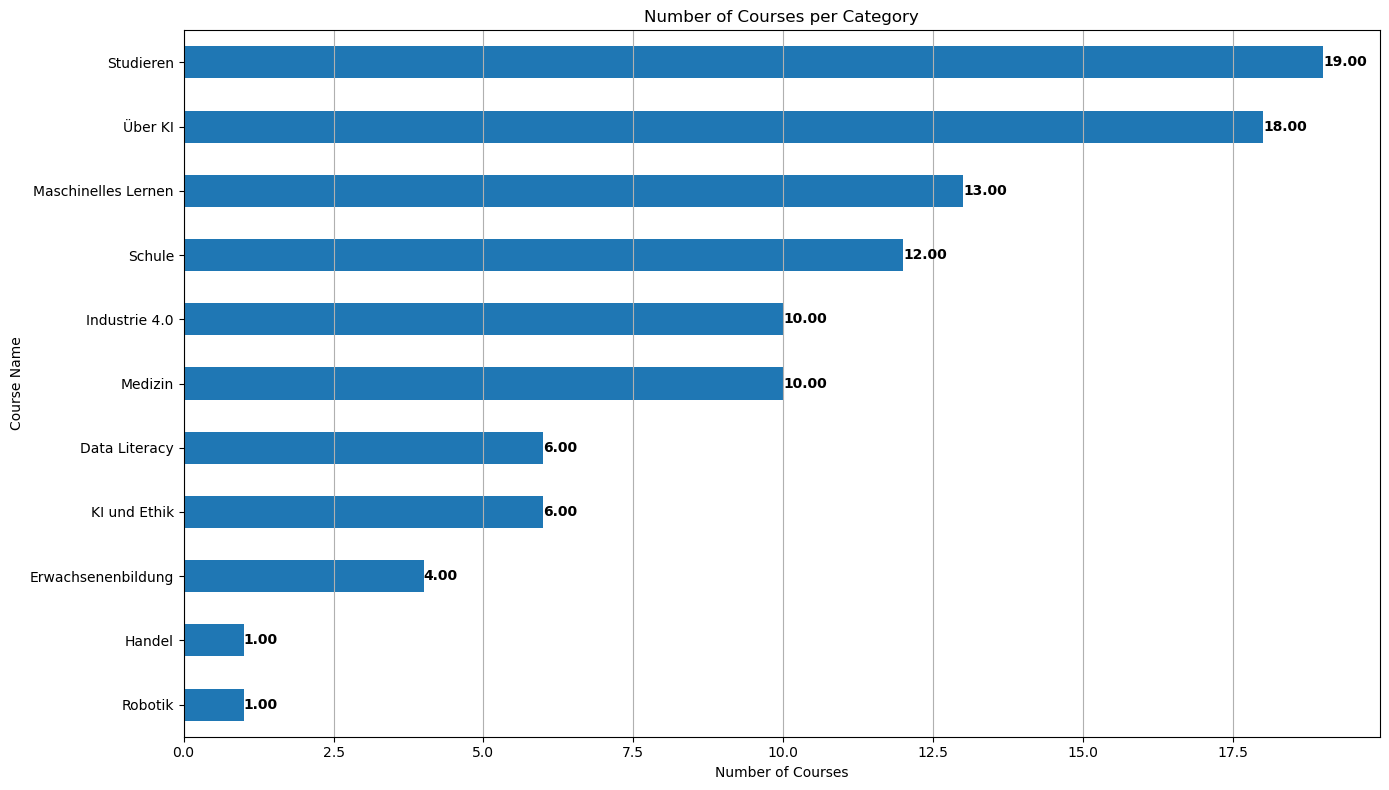

In [47]:
# plotting number of courses per category
plot_topX_horizontal('Number of Courses per Category', course_per_cat['num_courses'], xlabel = 'Number of Courses', x = 11, show_values = True)


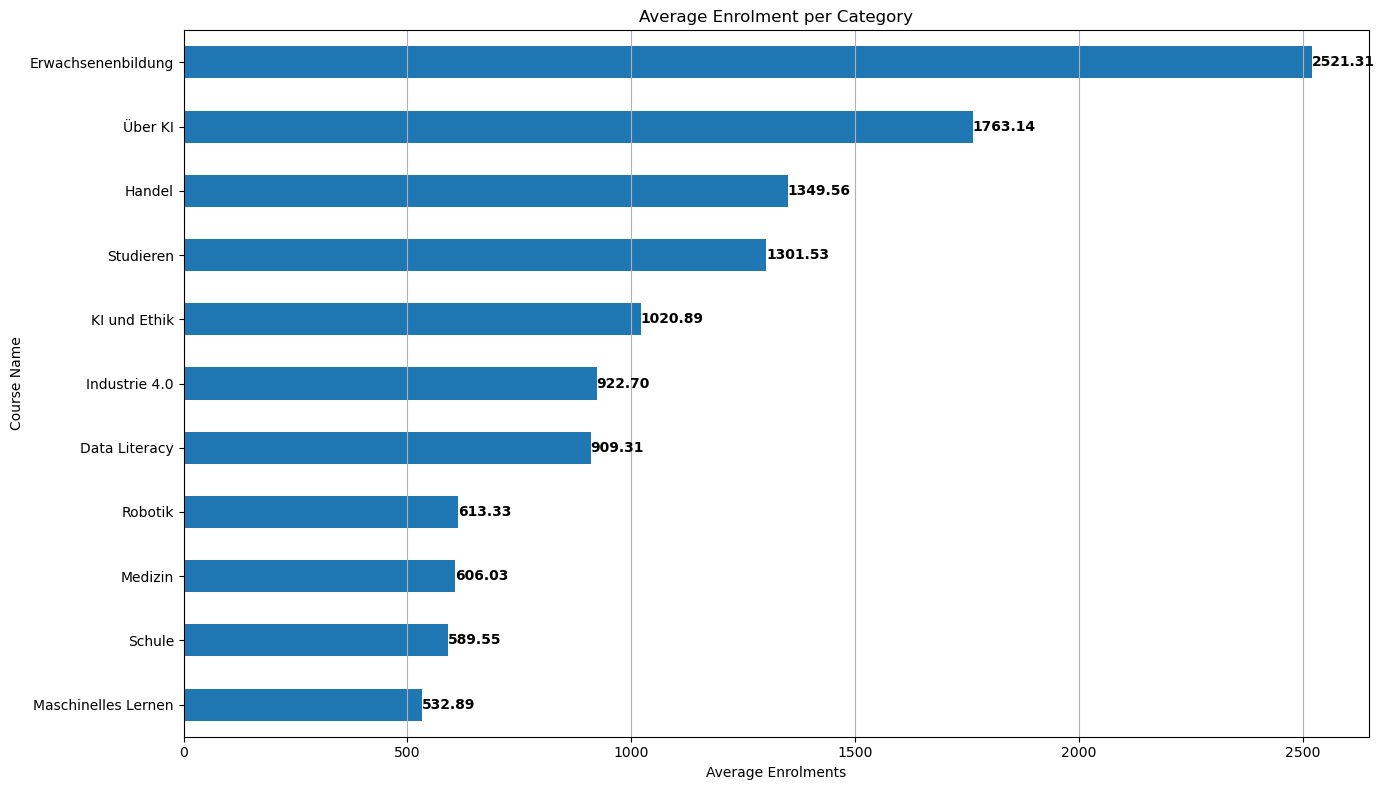

In [48]:
# plotting average enrol per category
plot_topX_horizontal('Average Enrolment per Category', course_per_cat['avg_enrol'], xlabel = 'Average Enrolments', x = 11, show_values = True)


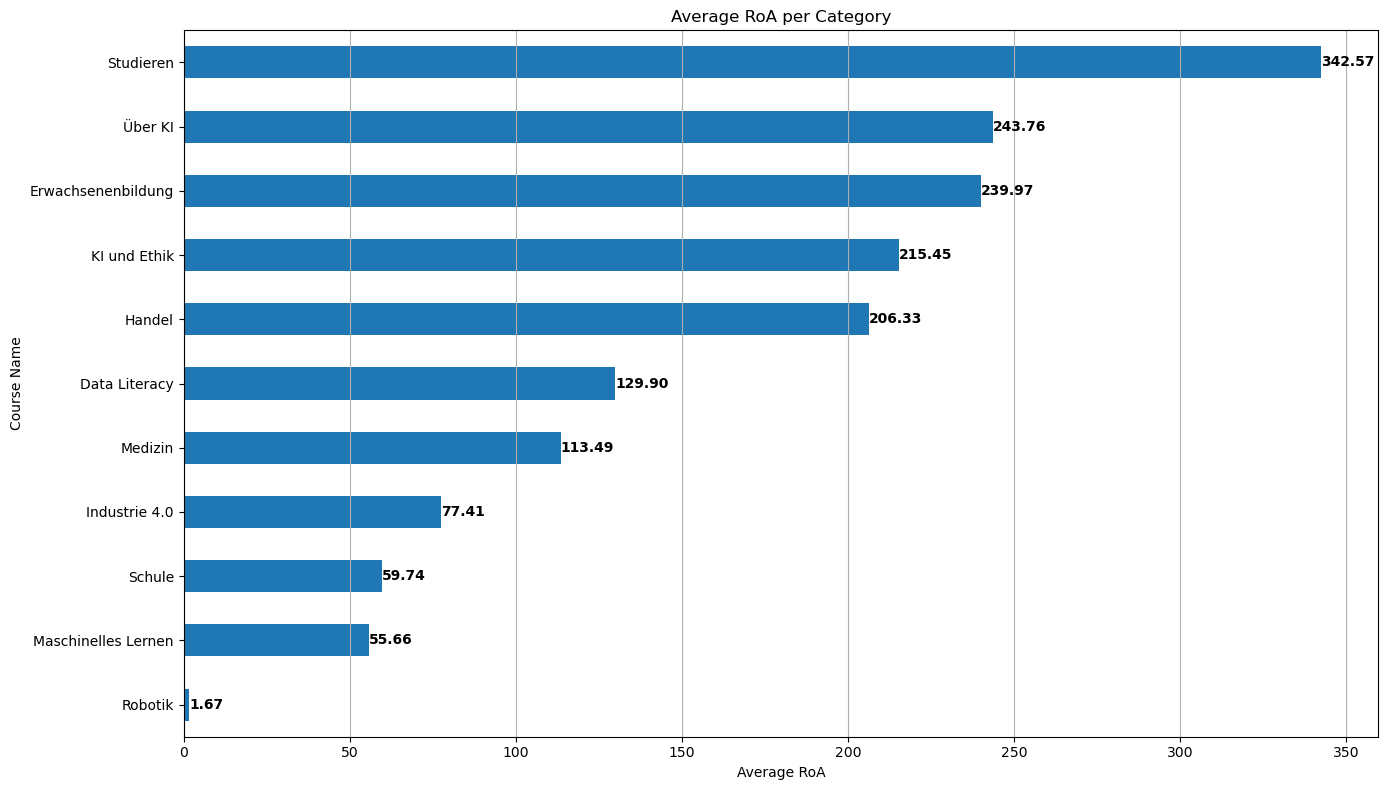

In [49]:
# plotting average RoA per category
plot_topX_horizontal('Average RoA per Category', course_per_cat['avg_RoA'], xlabel = 'Average RoA', x = 11, show_values = True)


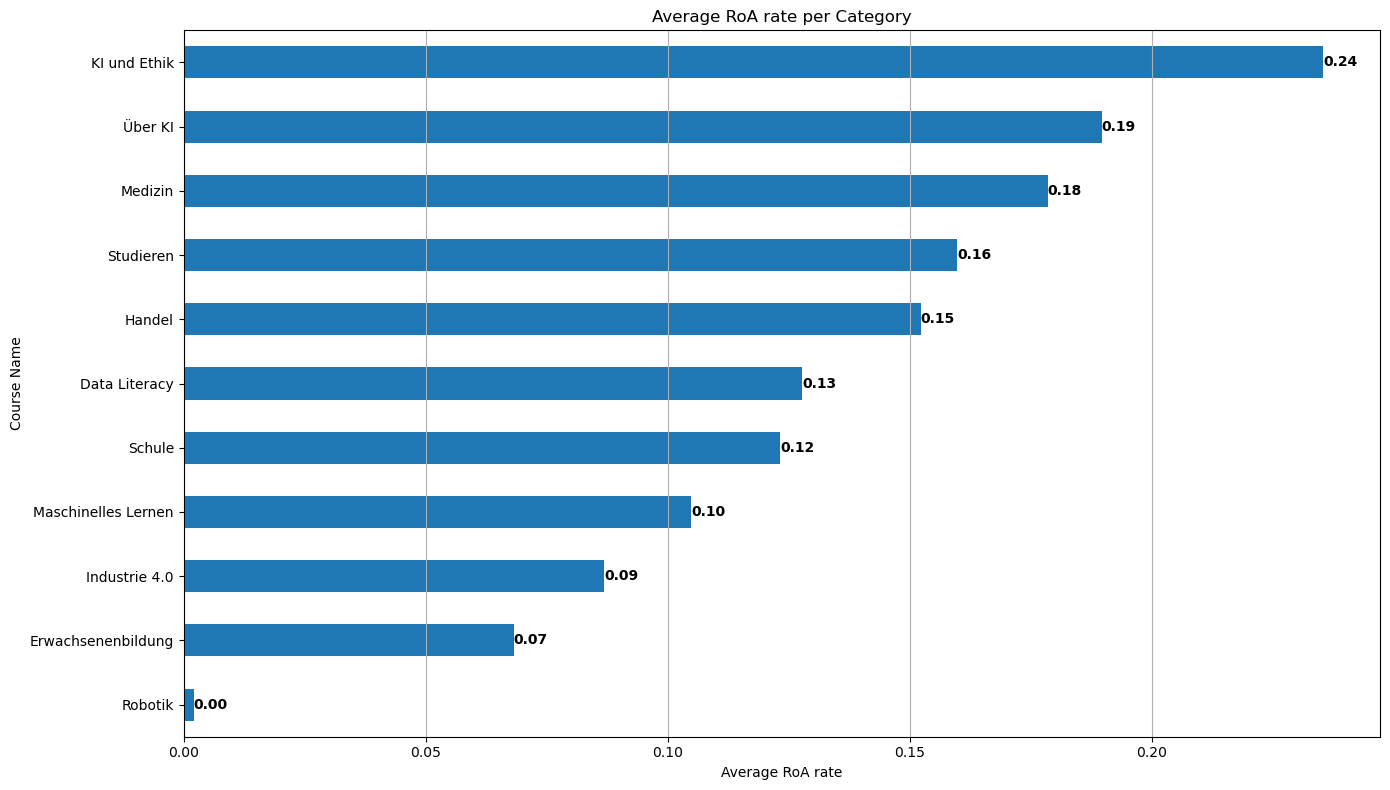

In [50]:
# plot average RoA rate per category
plot_topX_horizontal('Average RoA rate per Category', course_per_cat['avg_RoA_rate'], xlabel = 'Average RoA rate', x = 11, show_values = True)


In [51]:
# enrol per category
corr_per_cat= pd.DataFrame(course_df.groupby('Course Category')[['Enrolled learners', 'RoA', 'Rate RoA']].corr())

corr_per_cat

Enrolled learners       RoA  Rate RoA
Course Category                                                             
Data Literacy       Enrolled learners           1.000000  0.875860  0.255641
                    RoA                         0.875860  1.000000  0.580761
                    Rate RoA                    0.255641  0.580761  1.000000
Erwachsenenbildung  Enrolled learners           1.000000  0.930934  0.880370
                    RoA                         0.930934  1.000000  0.948749
                    Rate RoA                    0.880370  0.948749  1.000000
Handel              Enrolled learners           1.000000  0.967646  0.765242
                    RoA                         0.967646  1.000000  0.900914
                    Rate RoA                    0.765242  0.900914  1.000000
Industrie 4.0       Enrolled learners           1.000000  0.929036 -0.109363
                    RoA                         0.929036  1.000000  0.170687
                    Rate RoA                   -0.109363  0.170687  1.000000
KI und Ethik        Enrolled learners           1.000000  0.577770 -0.431083
                    RoA                         0.577770  1.000000  0.337166
                    Rate RoA                   -0.431083  0.337166  1.000000
Maschinelles Lernen Enrolled learners           1.000000  0.435219 -0.007964
                    RoA                         0.435219  1.000000  0.735569
                    Rate RoA                   -0.007964  0.735569  1.000000
Medizin             Enrolled learners           1.000000  0.975046  0.076202
                    RoA                         0.975046  1.000000  0.277450
                    Rate RoA                    0.076202  0.277450  1.000000
Robotik             Enrolled learners           1.000000  0.887744  0.871464
                    RoA                         0.887744  1.000000  0.995357
                    Rate RoA                    0.871464  0.995357  1.000000
Schule              Enrolled learners           1.000000  0.851475 -0.263047
                    RoA                         0.851475  1.000000  0.102550
                    Rate RoA                   -0.263047  0.102550  1.000000
Studieren           Enrolled learners           1.000000  0.896406  0.512998
                    RoA                         0.896406  1.000000  0.709932
                    Rate RoA                    0.512998  0.709932  1.000000
Über KI             Enrolled learners           1.000000  0.915273 -0.232869
                    RoA                         0.915273  1.000000  0.026127
                    Rate RoA                   -0.232869  0.026127  1.000000

<Axes: ylabel='Course Category-None'>

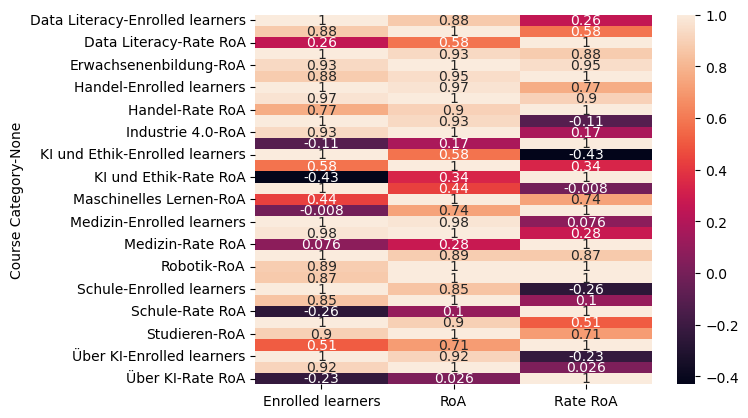

In [52]:
sns.heatmap(corr_per_cat, annot = True)

## Course workload - CoP / RoA investigation